# Bitcoin Price Prediction using Machine Learning and Deep Learning

## Dataset Analysis


#### Importing necessary libraries 

In [1]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

#### Importing the dataset csv file 

In [2]:
df = pd.read_csv('BTC-2021min.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [3]:
df.shape

(610782, 9)

#### The shape of the dataset is (610782, 9).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [5]:
df.isnull().any()

unix          False
date          False
symbol        False
open          False
high          False
low           False
close         False
Volume BTC    False
Volume USD    False
dtype: bool

#### The dataset does not contain any NULL values.

In [6]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


#### Now we train 3 models and find out which model gives highest accuracy and find optimal parameters. <br/> The models trained are:<br/>1. LSTM Model (Long short-term memory) <br/>2. Linear Regression<br/>3. SVM (Support Vector Machines)

## LSTM Model

In [7]:
df=df.drop('symbol',axis=1)

In [8]:
df=df.drop('unix',axis=1)
df.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,2022-03-01 03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,2022-03-01 03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,2022-03-01 03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,2022-03-01 03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [9]:
df_dt = df.astype({'date': 'datetime64'}) #dt->datetype

In [10]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        610782 non-null  datetime64[ns]
 1   open        610782 non-null  float64       
 2   high        610782 non-null  float64       
 3   low         610782 non-null  float64       
 4   close       610782 non-null  float64       
 5   Volume BTC  610782 non-null  float64       
 6   Volume USD  610782 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 32.6 MB


In [11]:
print('Null Values present:',df_dt.isnull().values.sum())
print('If any NA values:',df_dt.isnull().values.any())

Null Values present: 0
If any NA values: False


In [12]:
df_dt.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,2022-03-01 03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,2022-03-01 03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,2022-03-01 03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,2022-03-01 03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


### Bitcoin Weighted Price Plot

<AxesSubplot:title={'center':'Bitcoin Weighted Price'}, xlabel='date'>

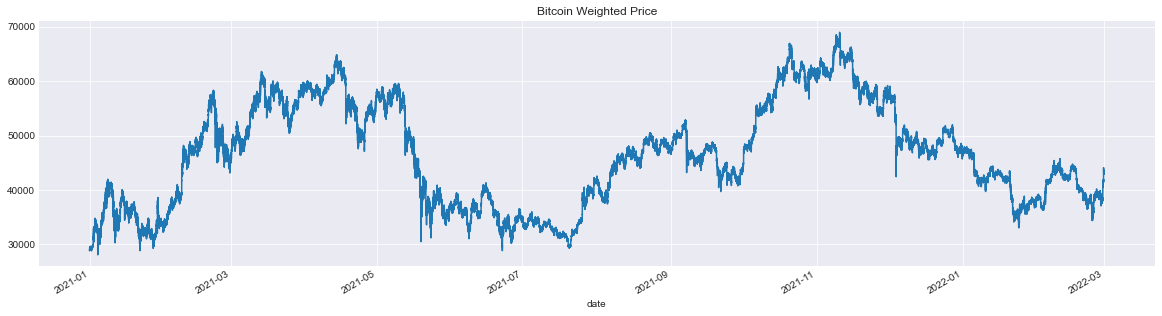

In [13]:
df_dt.set_index("date").close.plot(figsize=(20,5), title="Bitcoin Weighted Price")

### Lag plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


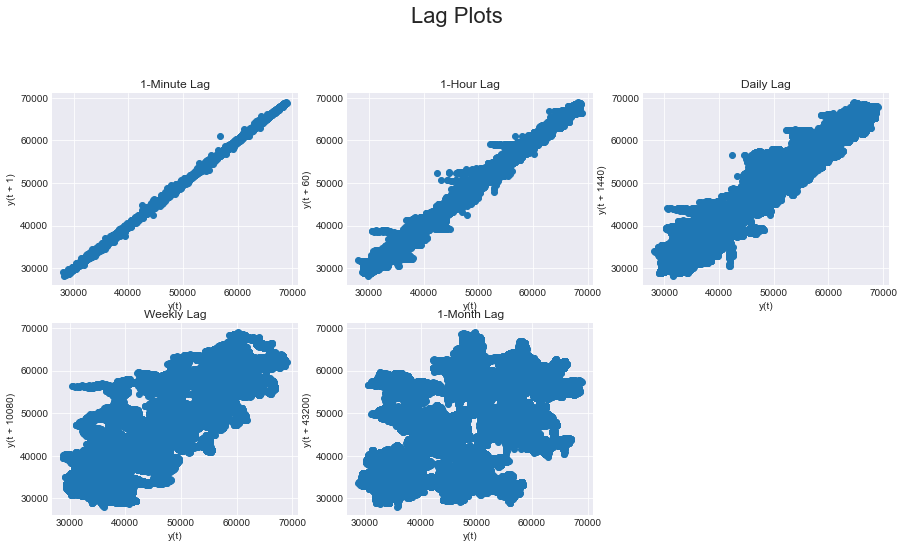

In [14]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(df_dt['close'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(df_dt['close'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(df_dt['close'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(df_dt['close'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(df_dt['close'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

#### There is a positive correlation for minute, hour and daily lag plots. This correlation decreases drastically with Weekly Lag and almost no correlation for month lag plots. Thus, we can re-sample our data atmost at the Daily level, thereby preserving the autocorrelation.

### Making the dataset ready for LSTM

In [16]:
# pd.to_datetime(unit='s) and then groupby('date')

df_dt['Date'] = pd.to_datetime(df_dt['date'],unit='s').dt.date
display(df_dt.head())

,date,open,high,low,close,Volume BTC,Volume USD,Date
0,2022-03-01 03:43:00,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01
1,2022-03-01 03:41:00,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01
2,2022-03-01 03:40:00,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01
3,2022-03-01 03:39:00,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01
4,2022-03-01 03:38:00,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01


In [17]:
group = df_dt.groupby('Date')
date_cp = group['close'].mean() #cp->closing price
display(date_cp.head(10))
print("Length of btc closing price groupby date :", len(date_cp))

Date
2021-01-01    29289.519819
2021-01-02    30759.932167
2021-01-03    33468.163000
2021-01-04    31856.172236
2021-01-05    32274.551042
2021-01-06    34907.603576
2021-01-07    38071.505882
2021-01-08    39811.639694
2021-01-09    40399.011125
2021-01-10    39730.883840
Name: close, dtype: float64

Length of btc closing price groupby date : 425


#### Train Test Split

In [18]:
# splitting the data into train and test 

prediction_days = 30
df_train= date_cp[:len(date_cp)-prediction_days].values.reshape(-1,1)
df_test= date_cp[len(date_cp)-prediction_days:].values.reshape(-1,1)

In [19]:
df_test.shape

(30, 1)

In [20]:
df_train.shape

(395, 1)

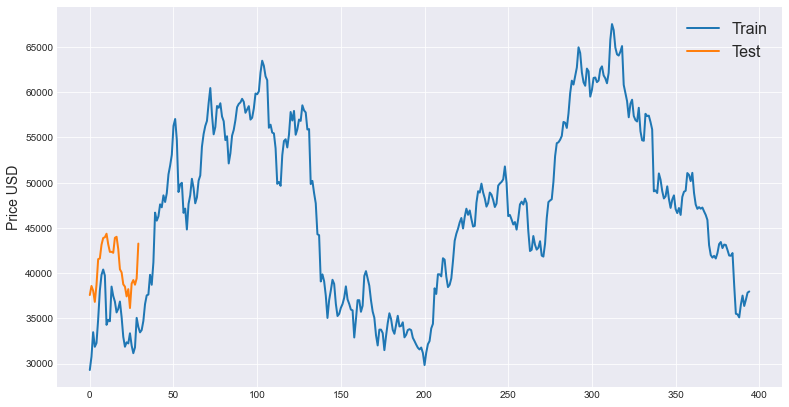

In [21]:
chosen_col = 'Close'

fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(df_train, label='Train', linewidth=2)
ax.plot(df_test, label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

#### Mix Max Scaling of Data post Train-Test Split

In [22]:
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test)

In [47]:
def dataset_generator_lstm(dataset,look_back=2):
    dataX,dataY = [],[]
    
    for i in range(len(dataset) - look_back):
        window_size_x = dataset[i:(i + look_back), 0]
        dataX.append(window_size_x)
        dataY.append(dataset[i + look_back, 0]) # this is the label or actual y-value
    return np.array(dataX), np.array(dataY)

trainX,trainY = dataset_generator_lstm(scaled_train)
testX,testY = dataset_generator_lstm(scaled_test)

In [48]:
print("trainX: ",trainX)

trainX:  [[0.         0.03844698]
 [0.03844698 0.10925929]
 [0.10925929 0.06711045]
 [0.06711045 0.07804983]
 [0.07804983 0.14689645]
 [0.14689645 0.22962324]
 [0.22962324 0.27512265]
 [0.27512265 0.2904807 ]
 [0.2904807  0.27301112]
 [0.27301112 0.13049587]
 [0.13049587 0.14520472]
 [0.14520472 0.14085315]
 [0.14085315 0.24112944]
 [0.24112944 0.21398022]
 [0.21398022 0.19757655]
 [0.19757655 0.16640753]
 [0.16640753 0.17672036]
 [0.17672036 0.19796416]
 [0.19796416 0.15337681]
 [0.15337681 0.09580023]
 [0.09580023 0.06726091]
 [0.06726091 0.08012943]
 [0.08012943 0.07678914]
 [0.07678914 0.10621081]
 [0.10621081 0.07079733]
 [0.07079733 0.0485803 ]
 [0.0485803  0.06546361]
 [0.06546361 0.15072701]
 [0.15072701 0.12459679]
 [0.12459679 0.10878151]
 [0.10878151 0.11549686]
 [0.11549686 0.14181364]
 [0.14181364 0.19043133]
 [0.19043133 0.21575928]
 [0.21575928 0.21810342]
 [0.21810342 0.27520382]
 [0.27520382 0.24643382]
 [0.24643382 0.31131678]
 [0.31131678 0.45486325]
 [0.45486325 0.4

In [49]:
# We need to reshape input to be a 3D Tensor of [samples, time steps, features]

In [50]:
trainX.shape

(393, 2)

In [51]:
testX.shape

(28, 2)

In [52]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))
print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)

Shape of trainX:  (393, 2, 1)
Shape of testX:  (28, 2, 1)


In [53]:
trainX

array([[[0.        ],
        [0.03844698]],

       [[0.03844698],
        [0.10925929]],

       [[0.10925929],
        [0.06711045]],

       [[0.06711045],
        [0.07804983]],

       [[0.07804983],
        [0.14689645]],

       [[0.14689645],
        [0.22962324]],

       [[0.22962324],
        [0.27512265]],

       [[0.27512265],
        [0.2904807 ]],

       [[0.2904807 ],
        [0.27301112]],

       [[0.27301112],
        [0.13049587]],

       [[0.13049587],
        [0.14520472]],

       [[0.14520472],
        [0.14085315]],

       [[0.14085315],
        [0.24112944]],

       [[0.24112944],
        [0.21398022]],

       [[0.21398022],
        [0.19757655]],

       [[0.19757655],
        [0.16640753]],

       [[0.16640753],
        [0.17672036]],

       [[0.17672036],
        [0.19796416]],

       [[0.19796416],
        [0.15337681]],

       [[0.15337681],
        [0.09580023]],

       [[0.09580023],
        [0.06726091]],

       [[0.06726091],
        [0.0

In [54]:
testX

array([[[0.17472661],
        [0.29702089]],

       [[0.29702089],
        [0.23357061]],

       [[0.23357061],
        [0.08300675]],

       [[0.08300675],
        [0.30981353]],

       [[0.30981353],
        [0.65765132]],

       [[0.65765132],
        [0.6674844 ]],

       [[0.6674844 ],
        [0.8511021 ]],

       [[0.8511021 ],
        [0.94280693]],

       [[0.94280693],
        [0.95177715]],

       [[0.95177715],
        [1.        ]],

       [[1.        ],
        [0.85838775]],

       [[0.85838775],
        [0.75559334]],

       [[0.75559334],
        [0.75648547]],

       [[0.75648547],
        [0.74335555]],

       [[0.74335555],
        [0.94520175]],

       [[0.94520175],
        [0.95864145]],

       [[0.95864145],
        [0.79312339]],

       [[0.79312339],
        [0.52107249]],

       [[0.52107249],
        [0.48005095]],

       [[0.48005095],
        [0.31907395]],

       [[0.31907395],
        [0.28790461]],

       [[0.28790461],
        [0.1

### LSTM

In [55]:
print("trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features) ", trainX.shape[1])
print("trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features) ", trainX.shape[2])

trainX.shape[1] - i.e. timesteps in input_shape = (timesteps, n_features)  2
trainX.shape[2] - i.e. n_features in input_shape = (timesteps, n_features)  1


In [56]:
regressor = Sequential()

# Adding the first layer
regressor.add(LSTM(units = 128, activation = 'tanh',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second layer
regressor.add(LSTM(units = 64, return_sequences = False, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer
#regressor.add(LSTM(units = 64, return_sequences = False, input_shape = (trainX.shape[1], trainX.shape[2])))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer
# regressor.add(LSTM(units = 64, input_shape = (trainX.shape[1], trainX.shape[2])))
# regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 2, 128)            66560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compiling the LSTM
regressor.compile(optimizer='Adam',loss ='mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',verbose=1, save_best_only=True,mode='min')

earlystopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
callbacks=[checkpoint,earlystopping]

history=regressor.fit(trainX,trainY,batch_size=32,epochs=300,verbose=1,shuffle=False,
                      validation_data=(testX,testY),callbacks=callbacks)

Epoch 1/300
13/13 [==============================] - 3s 72ms/step - loss: 0.2036 - val_loss: 0.2065

Epoch 00001: val_loss improved from inf to 0.20650, saving model to my_best_model.hdf5
Epoch 2/300
13/13 [==============================] - 0s 14ms/step - loss: 0.0635 - val_loss: 0.0506

Epoch 00002: val_loss improved from 0.20650 to 0.05064, saving model to my_best_model.hdf5
Epoch 3/300
13/13 [==============================] - 0s 10ms/step - loss: 0.0220 - val_loss: 0.0433

Epoch 00003: val_loss improved from 0.05064 to 0.04325, saving model to my_best_model.hdf5
Epoch 4/300
13/13 [==============================] - 0s 11ms/step - loss: 0.0173 - val_loss: 0.0479

Epoch 00004: val_loss did not improve from 0.04325
Epoch 5/300
13/13 [==============================] - 0s 10ms/step - loss: 0.0128 - val_loss: 0.0414

Epoch 00005: val_loss improved from 0.04325 to 0.04142, saving model to my_best_model.hdf5
Epoch 6/300
13/13 [==============================] - 0s 9ms/step - loss: 0.0093 - va

In [58]:
from tensorflow.keras.models import load_model
model_from_saved_checkpoint = load_model(checkpoint_path)

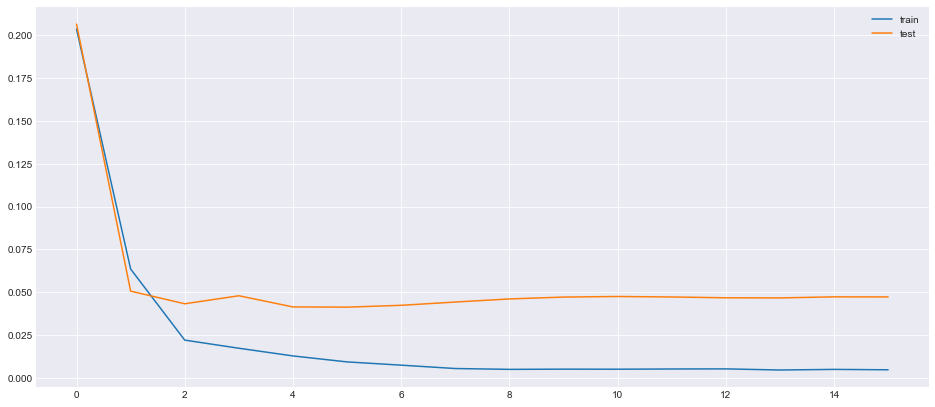

In [59]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [60]:
# LSTM Predictions using testX and plotting line graph against Actual testY
# Transformation to original form and making the predictions
# predicted_btc_price_test_data = regressor.predict(testX)

predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = scaler_test.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
test_actual = scaler_test.inverse_transform(testY.reshape(-1, 1))

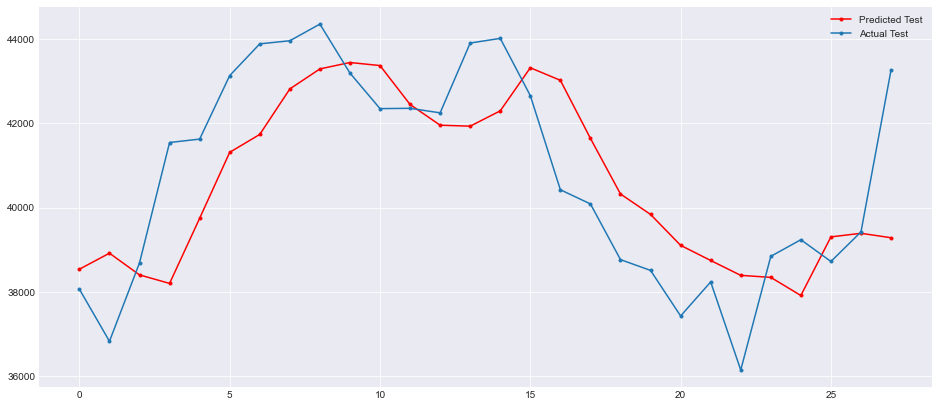

In [61]:
plt.figure(figsize=(16,7))
plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')
plt.plot(test_actual, marker='.', label='Actual Test')
plt.legend()
plt.show()

In [62]:
# LSTM Prediction using trainX and plotting line graph against Actual trainY
# Transformation to original form and making the predictions

predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_btc_price_train_data = scaler_train.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))
train_actual = scaler_train.inverse_transform(trainY.reshape(-1, 1))

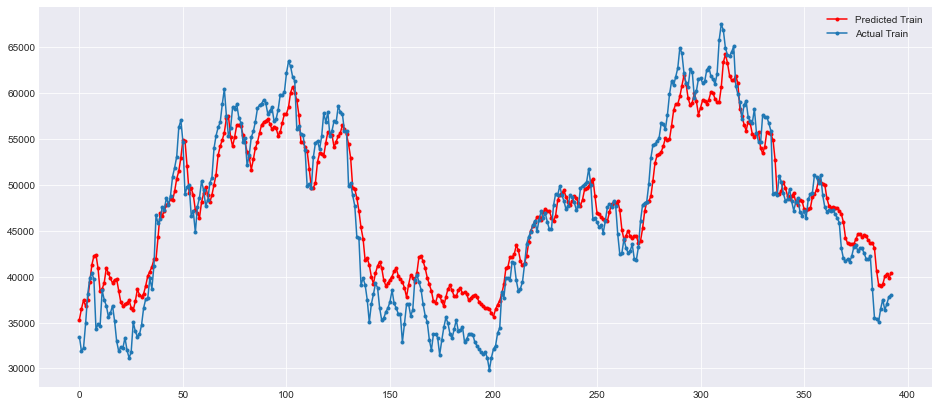

In [63]:
plt.figure(figsize=(16,7))
plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Train')
plt.plot(train_actual, marker='.', label='Actual Train')
plt.legend()
plt.show()

#### RMSE (Root Mean Square Error)

In [64]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))
print('Test RMSE: %.3f' % rmse_lstm_test)

Test RMSE: 1669.531


In [65]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))
print('Train RMSE: %.3f' % rmse_lstm_train)

Train RMSE: 2988.623


#### Results

In [66]:
# Activation function = relu
# with 5-> Epoch 00012: val_loss did not improve from 0.07791 Test RMSE: 2293.292 Train RMSE: 4423.008      2 layers
# with 4-> Epoch 00015: val_loss did not improve from 0.05242 Test RMSE: 1881.073 Train RMSE: 3640.659      2 layers
# with 3-> Epoch 00015: val_loss did not improve from 0.05613 Test RMSE: 1946.466 Train RMSE: 4309.407      3 layers
# with 2-> Epoch 00017: val_loss did not improve from 0.04293 Test RMSE: 1702.252 Train RMSE: 3628.300      3 layers
# with 2-> Epoch 00018: val_loss did not improve from 0.04136 Test RMSE: 1670.942 Train RMSE: 2998.144      2 layers


#look_back = 2 and layers = 2-> Epoch 00017: val_loss did not improve from 0.04140


# Activation function = tanh
# look_back = 2 and layers = 2->Epoch 00016: val_loss did not improve from 0.04113

## Linear Regression Model

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
bitcoin = pd.read_csv('BTC-2021min.csv')

In [80]:
bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [70]:
bitcoin.shape

(610782, 9)

In [72]:
required_features = ['open', 'high', 'low', 'Volume BTC', 'Volume USD', ]
output_label = 'close'

In [73]:
x_train, x_test, y_train, y_test = train_test_split(bitcoin[required_features],bitcoin[output_label],test_size = 0.3)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(x_test)

In [76]:
future_set = bitcoin.shift(periods=30).tail(30)

In [77]:
prediction = model.predict(future_set[required_features])

In [78]:
prediction

array([29057.42151133, 29059.78405058, 29081.34543319, 29078.58289799,
       29032.88534114, 29035.55904953, 29023.97273647, 29044.43853997,
       29040.14553761, 29016.03616469, 29030.62940216, 29024.76282424,
       29036.513684  , 29037.30020047, 29000.4090123 , 28989.30612707,
       29011.8260058 , 28996.56072976, 28983.92348706, 28996.96474793,
       28989.41288082, 28964.47822555, 28983.80995572, 28993.99946456,
       28977.2252568 , 28992.77591956, 28954.04652509, 28958.50633289,
       28944.24619478, 28950.40913155])

#### Bitcoin Price over Time graph

Text(0, 0.5, '$ Price')

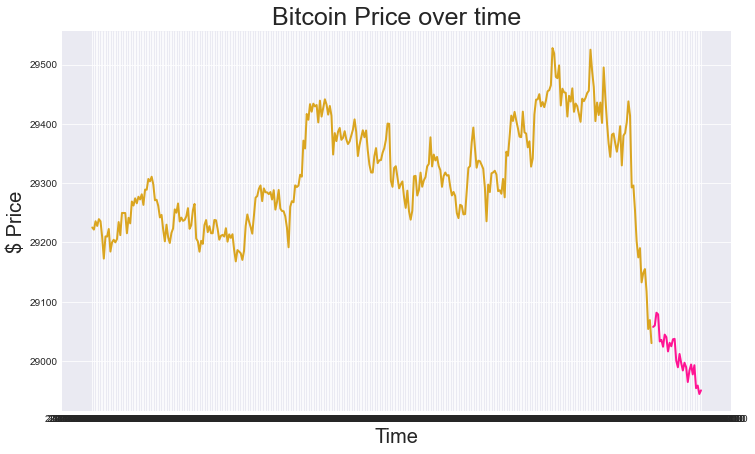

In [79]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["date"][-400:-60], bitcoin["close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["date"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

## Support Vector Machine

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [82]:
bitcoin_df = pd.read_csv('BTC-2021min.csv')

In [83]:
bitcoin_df.shape

(610782, 9)

In [84]:
bitcoin_df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


#### Bitcoin Volume over time plot

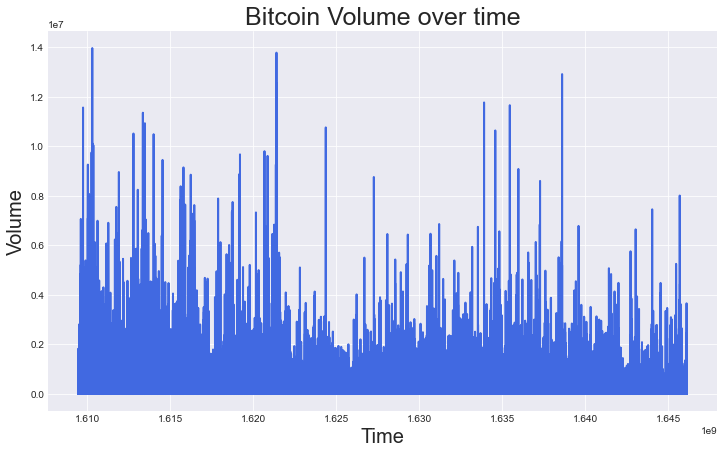

In [86]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_df["unix"], bitcoin_df["Volume USD"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20)
plt.show()

In [88]:
bitcoin_price = bitcoin_df[['close']]
bitcoin_price.rename(columns = {'close':'price'}, inplace = True)

In [89]:
bitcoin_price.head()

,price
0,43046.58
1,43046.58
2,43016.03
3,42999.44
4,43049.46


In [90]:
predictionDays = 30
# Create another column shifted 'n'  units up
bitcoin_price['prediction'] = bitcoin_price[['price']].shift(-predictionDays)
# show the first 5 rows
bitcoin_price.head()

,price,prediction
0,43046.58,43049.50
1,43046.58,43093.02
2,43016.03,43088.90
3,42999.44,43044.80
4,43049.46,43109.30


In [91]:
bitcoin_price.tail()

,price,prediction
610777,28999.50,NaN
610778,29045.19,NaN
610779,29048.13,NaN
610780,29035.89,NaN
610781,29083.47,NaN


In [92]:
# Create the independent data set
# Here we will convert the data frame into a numpy array and drp the prediction column
x = np.array(bitcoin_price.drop(['prediction'],1))
# Remove the last 'n' rows where 'n' is the predictionDays
x = x[:len(bitcoin_price)-predictionDays]
print(x)

[[43046.58]
 [43046.58]
 [43016.03]
 ...
 [28974.79]
 [28947.96]
 [28931.21]]


In [93]:
# Create the dependent data set
# convert the data frame into a numpy array
y = np.array(bitcoin_price['prediction'])
# Get all the values except last 'n' rows
y = y[:-predictionDays]
print(y)

[43049.5  43093.02 43088.9  ... 29048.13 29035.89 29083.47]


In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3)

In [95]:
# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(bitcoin_price.drop(['prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[28950.  ]
 [28910.87]
 [28900.07]
 [28914.43]
 [28920.26]
 [28932.43]
 [28907.28]
 [28919.39]
 [28889.32]
 [28852.31]
 [28827.83]
 [28916.52]
 [28898.38]
 [28888.52]
 [28893.34]
 [28825.45]
 [28834.74]
 [28811.01]
 [28899.24]
 [28888.34]
 [28925.13]
 [28937.66]
 [28941.55]
 [28990.35]
 [28997.36]
 [28999.5 ]
 [29045.19]
 [29048.13]
 [29035.89]
 [29083.47]]


In [ ]:
model = SVR(kernel='rbf', C=1e3, gamma=0.00001)
model.fit(xtrain, ytrain)